## Importing library & settings for library<a class="anchor" id="import"></a>


In [1]:
#@title
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

%cd /content/drive/MyDrive/DAS2022_Project

Mounted at /content/drive
/content/drive/MyDrive/DAS2022_Project


In [2]:
import numpy as np
import pandas as pd
import os
import math

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [4]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.font_manager import fontManager

# 改style要在改font之前
# plt.style.use('seaborn')  

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2022-07-31 14:21:47--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 74.125.143.101, 74.125.143.139, 74.125.143.113, ...
Connecting to drive.google.com (drive.google.com)|74.125.143.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/7tr3n8g0sahtlf29v7mmb5rcokug5k7i/1659277275000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=55bab5ad-91ea-42af-ac78-f81c00019086 [following]
--2022-07-31 14:21:51--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/7tr3n8g0sahtlf29v7mmb5rcokug5k7i/1659277275000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=55bab5ad-91ea-42af-ac78-f81c00019086
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 108.177.126.132, 2a00:1450:4013:c01::84
Connecting to doc-0

In [238]:
from sklearn import datasets, tree
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (FunctionTransformer, MinMaxScaler,
                    StandardScaler)
from sklearn.svm import LinearSVR
from xgboost import XGBRegressor

In [6]:
pd.set_option('display.max_columns', None)

## Loading the data & previewing<a class="anchor" id="load"></a>

In [133]:
df_txn = pd.read_excel('Data Collection of specific estates_2022.07.30.xlsx')

In [134]:
df_txn.head()

,id,rent,month,YYYY,MM,property_with_phase,phase_block_others,floor_level,floor_level_ind,flat,net_area_ft,net_area_m2,RVD_area_class,area_group,Unit_rent_per_ft,bedroom,download_source,estate_ID,estate_region,estate_district,estate_region_RVD,estate_name,CPI(A),CPI(B),CPI(C),estate_earliest_date_move_in_year,estate_age,estate_primary_school,estate_secondary_school,estate_blding_manager,ind_estate_Swimming_pool,ind_estate_Clubhouse,ind_estate_Kids_facilities,ind_estate_Sports_facilities,ind_estate_Catering_facility,ind_estate_Entertainment_facility,ind_estate_Mall,ind_estate_Health_n_beauty,ind_estate_Recreational_area,estate_closest_mtr,mtr_distance_m,ind_mtr_Tsuen_Wan_line,ind_mtr_East_Rail_line,ind_mtr_Kwun_Tong_line,ind_mtr_Island_line,ind_mtr_Tung_Chung_line,ind_mtr_Airport_Express,ind_mtr_Tseung_Kwan_O_line,ind_mtr_Tuen_Ma_line,ind_mtr_Disneyland_Resort_line,ind_mtr_South_Island_line,ind_mtr_Kowloon_Canton_railway
0,1,15800,202206,2022,6,日出康城 Montara,2B座,高層,3,C,450,41.806020,B,3,35.111111,2,midland,35,KL,康城,New Territories,日出康城,1,1,1,2008,15,95,中學: 西貢,港鐵公司,1,1,1,1,1,1,1,1,1,LOHAS Park,175.801766,0,0,0,0,0,0,1,0,0,0,0
1,2,18000,202206,2022,6,日出康城 首都,1座 R,低層,1,D,704,65.403196,B,4,25.568182,3,midland,35,KL,康城,New Territories,日出康城,1,1,1,2008,15,95,中學: 西貢,港鐵公司,1,1,1,1,1,1,1,1,1,LOHAS Park,175.801766,0,0,0,0,0,0,1,0,0,0,0
2,3,17800,202206,2022,6,日出康城 領都 - 領峯,8座 R,低層,1,B,654,60.758082,B,4,27.217125,3,midland,35,KL,康城,New Territories,日出康城,1,1,1,2008,15,95,中學: 西貢,港鐵公司,1,1,1,1,1,1,1,1,1,LOHAS Park,175.801766,0,0,0,0,0,0,1,0,0,0,0
3,4,13000,202206,2022,6,日出康城 晉海II,3A座,高層,3,F,343,31.865478,A,3,37.900875,1,midland,35,KL,康城,New Territories,日出康城,1,1,1,2008,15,95,中學: 西貢,港鐵公司,1,1,1,1,1,1,1,1,1,LOHAS Park,175.801766,0,0,0,0,0,0,1,0,0,0,0
4,5,15000,202206,2022,6,日出康城 Marini,3A座,高層,3,F,467,43.385359,B,3,32.119914,2,midland,35,KL,康城,New Territories,日出康城,1,1,1,2008,15,95,中學: 西貢,港鐵公司,1,1,1,1,1,1,1,1,1,LOHAS Park,175.801766,0,0,0,0,0,0,1,0,0,0,0


In [135]:
print(np.shape(df_txn))

(31964, 52)


In [136]:
df = df_txn.copy()

In [137]:
df['month_24m_ago'] = df['month'].apply(lambda x: x - 200)

In [138]:
# Files to map the latest RVD index and average rent to the master dataframe
df_RVD_avg_rent = pd.read_excel('RVD_1.1M_avg_rent_2022-07-27_long_form.xlsx')
df_RVD_index = pd.read_excel('RVD_1.3M_rent_ind_2022-07-27_long_form.xlsx')

In [139]:
df_RVD_avg_rent.head()

,Month,RVD_class_region,RVD_avg_rent
0,01-1999,Class A Hong Kong,190
1,02-1999,Class A Hong Kong,196
2,03-1999,Class A Hong Kong,199
3,04-1999,Class A Hong Kong,191
4,05-1999,Class A Hong Kong,191


In [140]:
df_RVD_index.head()

,Month,RVD_class,RVD_rent_index
0,01-1993,Class A,95
1,02-1993,Class A,95.5
2,03-1993,Class A,95.1
3,04-1993,Class A,95.8
4,05-1993,Class A,95.1


In [141]:
df_RVD_avg_rent['RVD_avg_rent'].loc[df_RVD_avg_rent['RVD_avg_rent'] == '-'] = 0

In [142]:
# change the format of MM-YYYY from RVD to YYYYMM used in transaction file
df_RVD_avg_rent['month_index'] = df_RVD_avg_rent['Month'].apply(lambda x: x[-4:]+x[:2]).astype(int)
df_RVD_index['month_index'] = df_RVD_index['Month'].apply(lambda x: x[-4:]+x[:2]).astype(int)

In [143]:
df_RVD_avg_rent[['RVD_area_class','estate_region_RVD']] = df_RVD_avg_rent['RVD_class_region'].str.extract('(\w+\s\w+)\s(\w.+)', expand=True)

In [144]:
# Change the format of Class A/B/C/D/E from RVD to just A/B/C/D/E used in transaction file
RVD_area_class_dict = {'Class A':'A','Class B':'B','Class C':'C','Class D':'D','Class E':'E'}
df_RVD_index['RVD_area_class'] = df_RVD_index['RVD_class'].apply(lambda x: RVD_area_class_dict.get(x, ''))
df_RVD_avg_rent['RVD_area_class'] = df_RVD_avg_rent['RVD_area_class'].apply(lambda x: RVD_area_class_dict.get(x, ''))

In [145]:
# Map the index of all class to transaction file by month
df_temp = df_RVD_index[['month_index','RVD_rent_index']][df_RVD_index['RVD_class'] == 'All Classes']
df_temp.columns = ['month','RVD_rent_index_all_class']
df = pd.merge(df, df_temp, how='left', on = 'month')

In [146]:
# Map the index of all class to transaction file by month (24m ago)
df_temp.columns = ['month_24m_ago','RVD_rent_index_all_class_24m_ago']
df = pd.merge(df, df_temp, how='left', on = 'month_24m_ago')

In [147]:
# Map the index of all class to transaction file by month and class
df_temp = df_RVD_index[['month_index','RVD_area_class','RVD_rent_index']]
df_temp = df_temp.rename(columns = {'month_index':'month'})
df = pd.merge(df, df_temp, how='left', on = ['month','RVD_area_class'])

In [148]:
# Map the index to transaction file by month (24m ago) and class
df_temp = df_RVD_index[['month_index','RVD_area_class','RVD_rent_index']]
df_temp = df_temp.rename(columns = {'month_index':'month_24m_ago','RVD_rent_index':'RVD_rent_index_24m_ago'})
df = pd.merge(df, df_temp, how='left', on = ['month_24m_ago','RVD_area_class'])

In [149]:
# Map the average rent to transaction file by month and class and region
df_temp = df_RVD_avg_rent[['month_index','RVD_area_class','estate_region_RVD','RVD_avg_rent']]
df_temp = df_temp.rename(columns = {'month_index':'month'})
df = pd.merge(df, df_temp, how='left', on = ['month','RVD_area_class','estate_region_RVD'])

In [150]:
# Map the average rent to transaction file by month (24m ago) and class and region
df_temp = df_RVD_avg_rent[['month_index','RVD_area_class','estate_region_RVD','RVD_avg_rent']]
df_temp = df_temp.rename(columns = {'month_index':'month_24m_ago','RVD_avg_rent':'RVD_avg_rent_24m_ago'})
df = pd.merge(df, df_temp, how='left', on = ['month_24m_ago','RVD_area_class','estate_region_RVD'])

In [151]:
df.head()

,id,rent,month,YYYY,MM,property_with_phase,phase_block_others,floor_level,floor_level_ind,flat,net_area_ft,net_area_m2,RVD_area_class,area_group,Unit_rent_per_ft,bedroom,download_source,estate_ID,estate_region,estate_district,estate_region_RVD,estate_name,CPI(A),CPI(B),CPI(C),estate_earliest_date_move_in_year,estate_age,estate_primary_school,estate_secondary_school,estate_blding_manager,ind_estate_Swimming_pool,ind_estate_Clubhouse,ind_estate_Kids_facilities,ind_estate_Sports_facilities,ind_estate_Catering_facility,ind_estate_Entertainment_facility,ind_estate_Mall,ind_estate_Health_n_beauty,ind_estate_Recreational_area,estate_closest_mtr,mtr_distance_m,ind_mtr_Tsuen_Wan_line,ind_mtr_East_Rail_line,ind_mtr_Kwun_Tong_line,ind_mtr_Island_line,ind_mtr_Tung_Chung_line,ind_mtr_Airport_Express,ind_mtr_Tseung_Kwan_O_line,ind_mtr_Tuen_Ma_line,ind_mtr_Disneyland_Resort_line,ind_mtr_South_Island_line,ind_mtr_Kowloon_Canton_railway,month_24m_ago,RVD_rent_index_all_class,RVD_rent_index_all_class_24m_ago,RVD_rent_index,RVD_rent_index_24m_ago,RVD_avg_rent,RVD_avg_rent_24m_ago
0,1,15800,202206,2022,6,日出康城 Montara,2B座,高層,3,C,450,41.806020,B,3,35.111111,2,midland,35,KL,康城,New Territories,日出康城,1,1,1,2008,15,95,中學: 西貢,港鐵公司,1,1,1,1,1,1,1,1,1,LOHAS Park,175.801766,0,0,0,0,0,0,1,0,0,0,0,202006,178,180.1,177.3,180.5,260,251
1,2,18000,202206,2022,6,日出康城 首都,1座 R,低層,1,D,704,65.403196,B,4,25.568182,3,midland,35,KL,康城,New Territories,日出康城,1,1,1,2008,15,95,中學: 西貢,港鐵公司,1,1,1,1,1,1,1,1,1,LOHAS Park,175.801766,0,0,0,0,0,0,1,0,0,0,0,202006,178,180.1,177.3,180.5,260,251
2,3,17800,202206,2022,6,日出康城 領都 - 領峯,8座 R,低層,1,B,654,60.758082,B,4,27.217125,3,midland,35,KL,康城,New Territories,日出康城,1,1,1,2008,15,95,中學: 西貢,港鐵公司,1,1,1,1,1,1,1,1,1,LOHAS Park,175.801766,0,0,0,0,0,0,1,0,0,0,0,202006,178,180.1,177.3,180.5,260,251
3,4,13000,202206,2022,6,日出康城 晉海II,3A座,高層,3,F,343,31.865478,A,3,37.900875,1,midland,35,KL,康城,New Territories,日出康城,1,1,1,2008,15,95,中學: 西貢,港鐵公司,1,1,1,1,1,1,1,1,1,LOHAS Park,175.801766,0,0,0,0,0,0,1,0,0,0,0,202006,178,180.1,194,199.3,310,298
4,5,15000,202206,2022,6,日出康城 Marini,3A座,高層,3,F,467,43.385359,B,3,32.119914,2,midland,35,KL,康城,New Territories,日出康城,1,1,1,2008,15,95,中學: 西貢,港鐵公司,1,1,1,1,1,1,1,1,1,LOHAS Park,175.801766,0,0,0,0,0,0,1,0,0,0,0,202006,178,180.1,177.3,180.5,260,251


In [152]:
print(np.shape(df))

(31964, 59)


In [153]:
print(df.columns)

Index(['id', 'rent', 'month', 'YYYY', 'MM', 'property_with_phase',
       'phase_block_others', 'floor_level', 'floor_level_ind', 'flat',
       'net_area_ft', 'net_area_m2', 'RVD_area_class', 'area_group',
       'Unit_rent_per_ft', 'bedroom', 'download_source', 'estate_ID',
       'estate_region', 'estate_district', 'estate_region_RVD', 'estate_name',
       'CPI(A)', 'CPI(B)', 'CPI(C)', 'estate_earliest_date_move_in_year',
       'estate_age', 'estate_primary_school', 'estate_secondary_school',
       'estate_blding_manager', 'ind_estate_Swimming_pool',
       'ind_estate_Clubhouse', 'ind_estate_Kids_facilities',
       'ind_estate_Sports_facilities', 'ind_estate_Catering_facility',
       'ind_estate_Entertainment_facility', 'ind_estate_Mall',
       'ind_estate_Health_n_beauty', 'ind_estate_Recreational_area',
       'estate_closest_mtr', 'mtr_distance_m', 'ind_mtr_Tsuen_Wan_line',
       'ind_mtr_East_Rail_line', 'ind_mtr_Kwun_Tong_line',
       'ind_mtr_Island_line', 'ind_mtr_Tu

## Defining columns and preparing data according to columns<a class="anchor" id="define"></a>

### Defining columns - direct from source<a class="anchor" id="define_direct"></a>

In [154]:
col_response = ["rent", "Unit_rent_per_ft"]
len(col_response)

2

In [155]:
col_values = ["net_area_ft", "area_group", "bedroom", "estate_age", "mtr_distance_m"]
len(col_values)

5

In [156]:
col_categorical = ["floor_level_ind", "RVD_area_class", "estate_region", "estate_district", "estate_region_RVD", "estate_primary_school", "estate_secondary_school", "estate_blding_manager", "ind_estate_Swimming_pool", "ind_estate_Clubhouse", "ind_estate_Kids_facilities", "ind_estate_Sports_facilities", "ind_estate_Catering_facility", "ind_estate_Entertainment_facility", "ind_estate_Mall", "ind_estate_Health_n_beauty", "ind_estate_Recreational_area", "estate_closest_mtr", "ind_mtr_Tsuen_Wan_line", "ind_mtr_East_Rail_line", "ind_mtr_Kwun_Tong_line", "ind_mtr_Island_line", "ind_mtr_Tung_Chung_line", "ind_mtr_Airport_Express", "ind_mtr_Tseung_Kwan_O_line", "ind_mtr_Tuen_Ma_line", "ind_mtr_Disneyland_Resort_line", "ind_mtr_South_Island_line"]
len(col_categorical)

28

In [157]:
# RVD columns mapped from RVD files
col_values_RVD = ["RVD_rent_index_all_class", "RVD_rent_index", "RVD_avg_rent"]
col_values_RVD_24m = ["RVD_rent_index_all_class_24m_ago", "RVD_rent_index_24m_ago", "RVD_avg_rent_24m_ago"]
len(col_values_RVD)

3

In [158]:
col_drop_1st = ["id", "property_with_phase", "phase_block_others", "floor_level", "flat", "download_source", "estate_ID", "estate_name", "CPI(A)", "CPI(B)", "CPI(C)", "estate_earliest_date_move_in_year", "month", "month_24m_ago", "ind_mtr_Kowloon_Canton_railway"]
len(col_drop_1st)

15

In [159]:
col_drop_after_working = ["YYYY", "MM", "net_area_m2"]
len(col_drop_after_working)

3

In [160]:
# Check if all columns from the master table defined and show the non-defined columns
list(set(df.columns) - set(col_response + col_values + col_categorical + col_values_RVD + col_values_RVD_24m + col_drop_1st + col_drop_after_working))

[]

### Defining columns - derivatives<a class="anchor" id="define_derivative"></a>

In [161]:
# Define number of month starting from the transaction year/month to current month (2022/6)
def change_year_month_to_month(year, month):
    return((2022 - year) * 12 + (6 - month))

df["month_from_now"] = df[["YYYY", "MM"]].apply(lambda x: change_year_month_to_month(x["YYYY"], x["MM"]), axis=1)
df["month_from_now"].head()

0    0
1    0
2    0
3    0
4    0
Name: month_from_now, dtype: int64

Not adopted as tested by XGBoost model and appears no use
```
col_values.append("month_from_now")
```

In [163]:
print('max = ', df['mtr_distance_m'].max())
print('min = ', df['mtr_distance_m'].min())
print('range = ', df['mtr_distance_m'].max() - df['mtr_distance_m'].min())

max =  4297.475462420409
min =  26.51031826089121
range =  4270.965144159518


In [164]:
no_of_mtr_cat = 10
df['mtr_distance_ind'] = pd.cut(df['mtr_distance_m'], [x - 0.01 for x in np.quantile(df['mtr_distance_m'].unique(), [x/10 for x in range(no_of_mtr_cat-1)])], labels=False).fillna(no_of_mtr_cat-2)

In [165]:
col_categorical.append('mtr_distance_ind')

*Not adopted as tested by XGBoost model and decrease of performance*
```
df['estate_age_ind'] = pd.cut(df['estate_age'], [x * 10 for x in range(math.ceil(df["estate_age"].max()/10)+1)])
col_categorical.append('estate_age_ind')
```

In [166]:
df[['RVD_avg_rent', 'RVD_avg_rent_24m_ago']] = df[['RVD_avg_rent', 'RVD_avg_rent_24m_ago']].astype('int')

In [167]:
df["RVD_rent_index_all_class_times_size"] = df["RVD_rent_index_all_class"] * df["net_area_m2"]
df["RVD_rent_index_times_size"] = df["RVD_rent_index"] * df["net_area_m2"]
df["RVD_avg_rent_times_size"] = df["RVD_avg_rent"] * df["net_area_m2"]

In [168]:
col_values_RVD.extend(["RVD_rent_index_all_class_times_size", "RVD_rent_index_times_size", "RVD_avg_rent_times_size"])

In [169]:
# Check if all columns from the master table defined and show the non-defined columns
list(set(df.columns) - set(col_response + col_values + col_categorical + col_values_RVD + col_values_RVD_24m + col_drop_1st + col_drop_after_working))

[]

### Preparing data<a class="anchor" id="prepare"></a>

In [170]:
df['estate_blding_manager'].fillna(value='', inplace=True)

In [171]:
df[col_categorical] = df[col_categorical].astype("category")

In [172]:
col_drop = col_drop_1st + col_drop_after_working

## Exploratory analysis for data (Values)<a class="anchor" id="ex_values"></a>


### Exploratory analysis for data (Values) - Codes<a class="anchor" id="ex_values_codes"></a>


In [46]:
data = df[col_values + col_values_RVD + col_response].copy()

In [47]:
data["log_rent"] = data["rent"].apply(np.log1p)
data["log_Unit_rent_per_ft"] = data["Unit_rent_per_ft"].apply(np.log1p)

In [48]:
print(data.describe())

        net_area_ft    area_group       bedroom    estate_age  mtr_distance_m  \
count  31964.000000  31964.000000  31964.000000  31964.000000    31964.000000   
mean     574.013546      3.630428      2.265611     20.506851      651.426645   
std      222.297007      0.914676      0.760887     13.553542      861.809569   
min      173.000000      1.000000      0.000000      2.000000       26.510318   
25%      441.000000      3.000000      2.000000     10.000000      175.801766   
50%      528.000000      3.000000      2.000000     18.000000      344.203558   
75%      680.000000      4.000000      3.000000     31.000000      734.456000   
max     4190.000000      9.000000     10.000000     55.000000     4297.475462   

       month_from_now  RVD_avg_rent  RVD_avg_rent_times_size           rent  \
count    31964.000000  31964.000000             31964.000000   31964.000000   
mean        16.089319    304.051902             16137.945947   19293.645852   
std         10.363158     52.3972

In [49]:
%matplotlib inline
def plot_subplots_box(data, n_row = 1):
  fig, axs = plt.subplots(ncols=math.ceil(np.shape(data)[1] / n_row), nrows=n_row, figsize=(20, 10))
  index = 0
  axs = axs.flatten()
  for k,v in data.items():
      sns.boxplot(x=None, y=str(k), data=data, ax=axs[index])
      index += 1
  plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [50]:
%matplotlib inline
def plot_subplots_regplot(data, y, n_row = 1):
  min_max_scaler = MinMaxScaler()
  x = pd.DataFrame(data=min_max_scaler.fit_transform(data), columns=data.columns)
  fig, axs = plt.subplots(ncols=math.ceil(np.shape(data)[1] / n_row), nrows=n_row, figsize=(20, 10))
  index = 0
  axs = axs.flatten()
  for i, k in enumerate(data.columns):
      sns.regplot(y=y, x=x[k], ax=axs[i], line_kws={"color": "red"})
      index += 1
  plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

### Exploratory analysis for data (Values) - Results<a class="anchor" id="ex_values_results"></a>


In [51]:
print(data.isnull().sum())

net_area_ft                            0
area_group                             0
bedroom                                0
estate_age                             0
mtr_distance_m                         0
month_from_now                         0
RVD_rent_index_all_class               0
RVD_rent_index                         0
RVD_avg_rent                           0
RVD_rent_index_all_class_times_size    0
RVD_rent_index_times_size              0
RVD_avg_rent_times_size                0
rent                                   0
Unit_rent_per_ft                       0
log_rent                               0
log_Unit_rent_per_ft                   0
dtype: int64


In [52]:
for k, v in data.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))

Column net_area_ft outliers = 3.13%
Column area_group outliers = 3.02%
Column bedroom outliers = 2.11%
Column estate_age outliers = 0.00%
Column mtr_distance_m outliers = 9.22%
Column month_from_now outliers = 0.00%
Column RVD_rent_index_all_class outliers = 9.47%
Column RVD_rent_index outliers = 8.61%
Column RVD_avg_rent outliers = 0.13%
Column RVD_rent_index_all_class_times_size outliers = 3.39%
Column RVD_rent_index_times_size outliers = 1.64%
Column RVD_avg_rent_times_size outliers = 4.42%
Column rent outliers = 4.79%
Column Unit_rent_per_ft outliers = 2.67%
Column log_rent outliers = 2.03%
Column log_Unit_rent_per_ft outliers = 0.76%


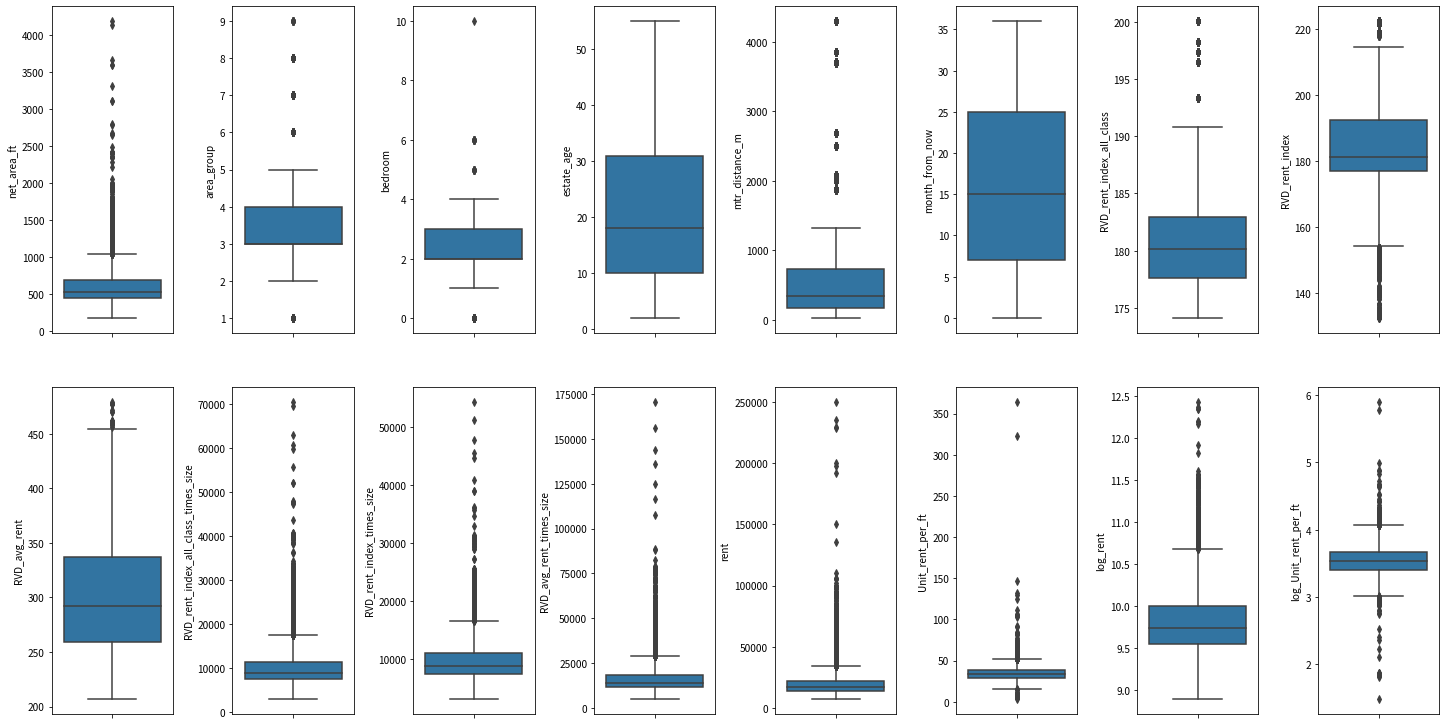

In [53]:
plot_subplots_box(data, 2)

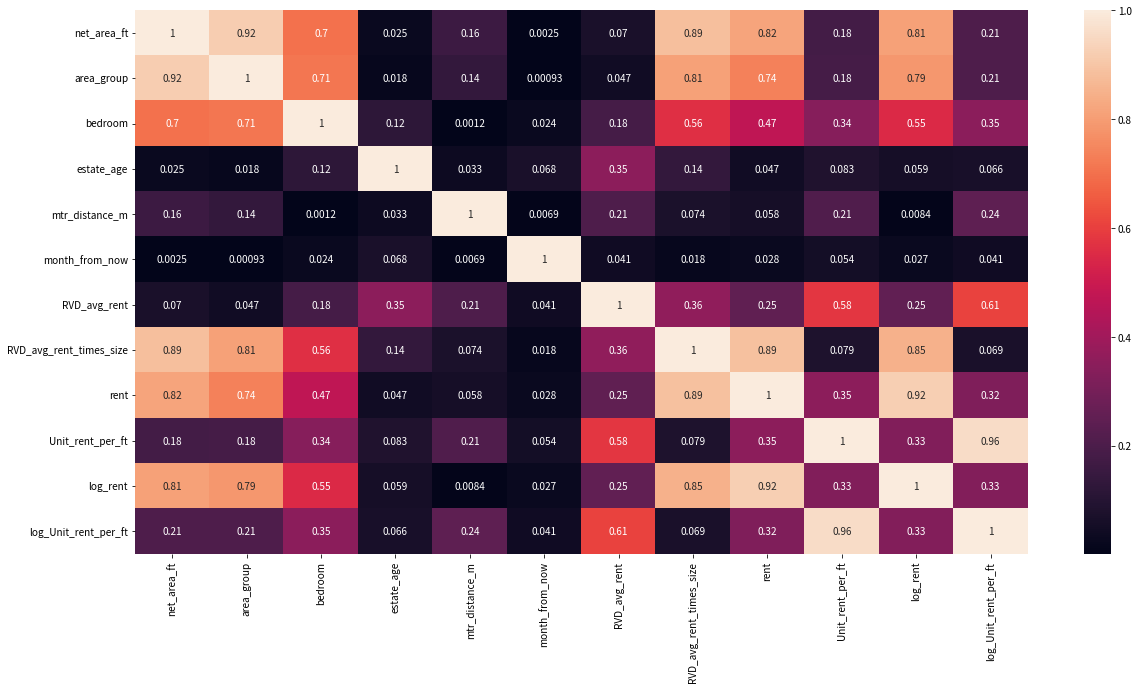

In [54]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr().abs(),  annot=True)

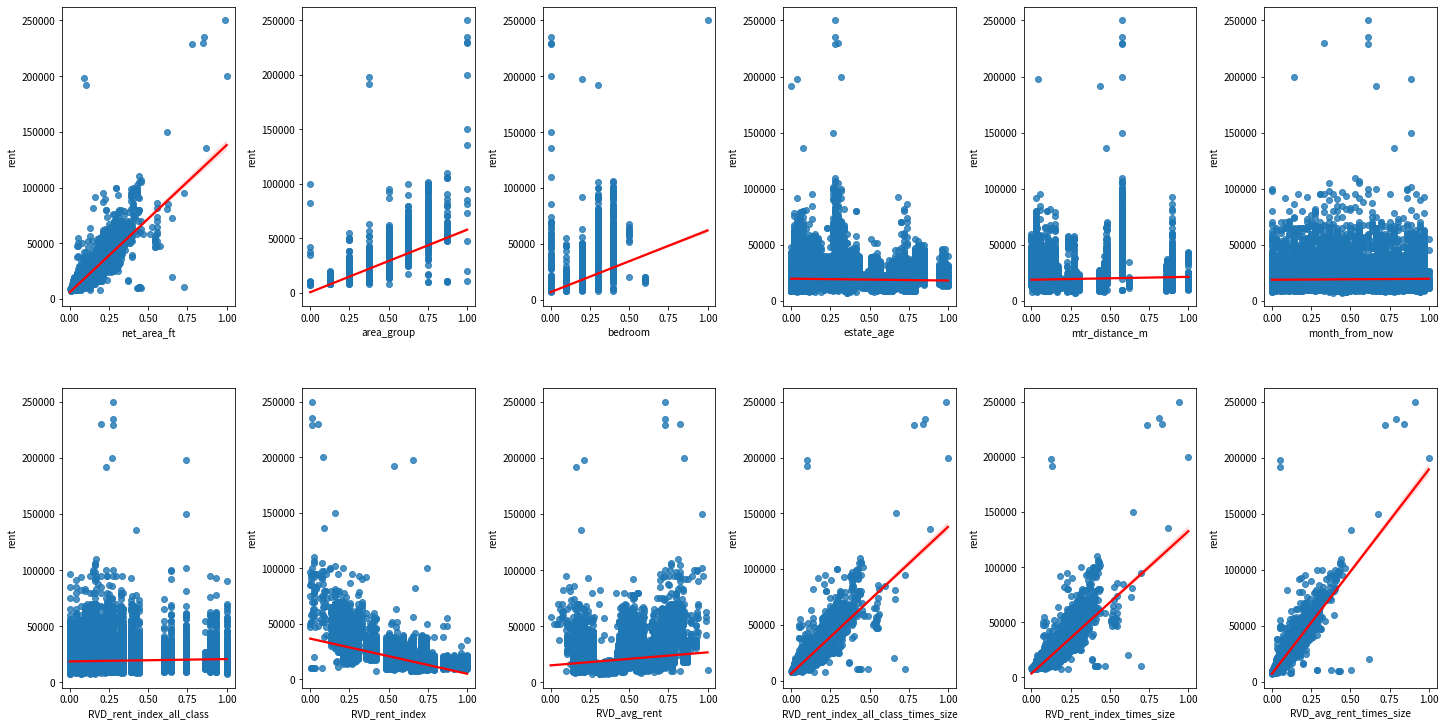

In [70]:
plot_subplots_regplot(data[col_values + col_values_RVD], data["rent"], 2)

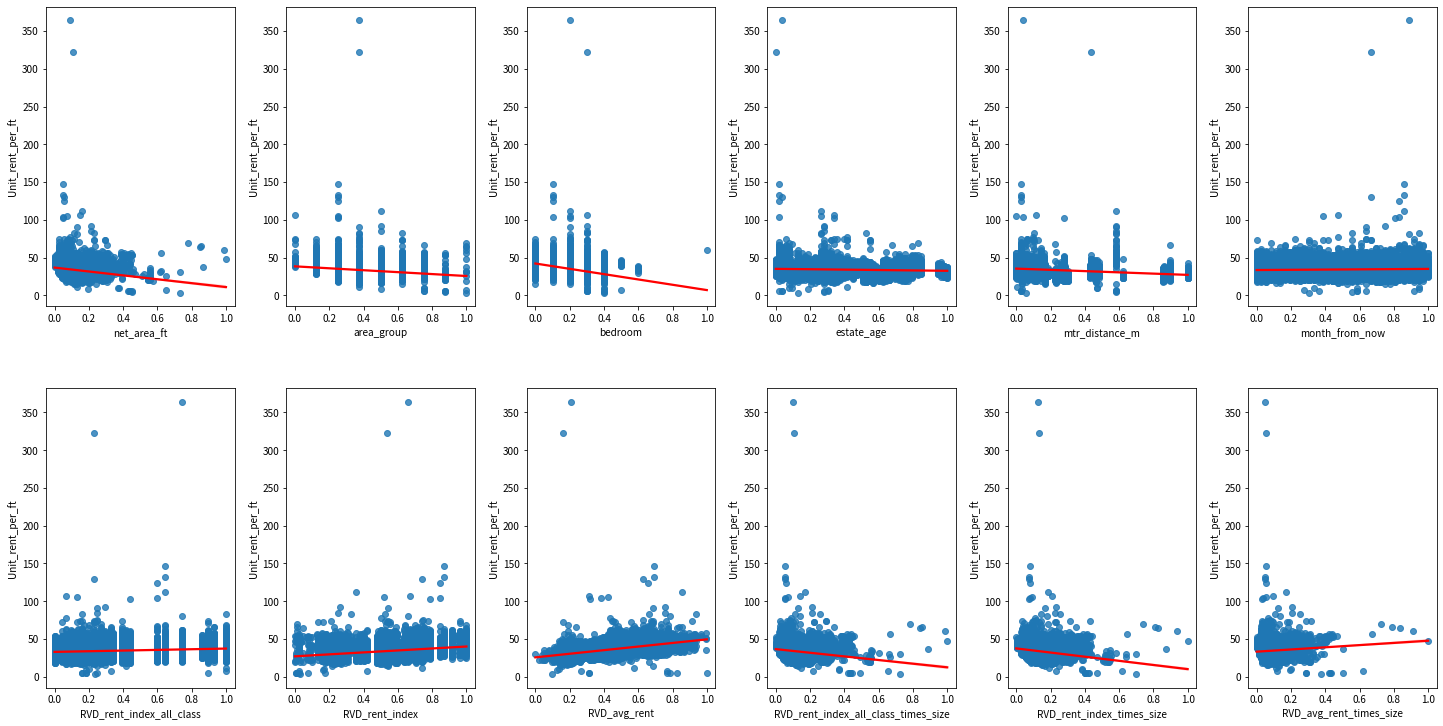

In [71]:
plot_subplots_regplot(data[col_values + col_values_RVD], data["Unit_rent_per_ft"], 2)

## Exploratory analysis for data (Categorical)<a class="anchor" id="ex_cat"></a>


### Exploratory analysis for data (Categorical) - Codes<a class="anchor" id="ex_cat_codes"></a>


In [57]:
data = df[col_categorical + col_response].copy()

In [58]:
%matplotlib inline
def plot_subplots_stripplot(data, y, n_row = 1):
  fig, axs = plt.subplots(ncols=math.ceil(np.shape(data)[1] / n_row), nrows=n_row, figsize=(20, 10))
  index = 0
  axs = axs.flatten()
  for i, k in enumerate(data.columns):
      sns.stripplot(y=y, x=data[k], ax=axs[i])
      index += 1
  plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

### Exploratory analysis for data (Categorical) - Results<a class="anchor" id="ex_cat_result"></a>


In [59]:
print(data.isnull().sum())

floor_level_ind                         0
RVD_area_class                          0
estate_region                           0
estate_district                         0
estate_region_RVD                       0
estate_primary_school                   0
estate_secondary_school                 0
estate_blding_manager                9846
ind_estate_Swimming_pool                0
ind_estate_Clubhouse                    0
ind_estate_Kids_facilities              0
ind_estate_Sports_facilities            0
ind_estate_Catering_facility            0
ind_estate_Entertainment_facility       0
ind_estate_Mall                         0
ind_estate_Health_n_beauty              0
ind_estate_Recreational_area            0
estate_closest_mtr                      0
ind_mtr_Tsuen_Wan_line                  0
ind_mtr_East_Rail_line                  0
ind_mtr_Kwun_Tong_line                  0
ind_mtr_Island_line                     0
ind_mtr_Tung_Chung_line                 0
ind_mtr_Airport_Express           

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


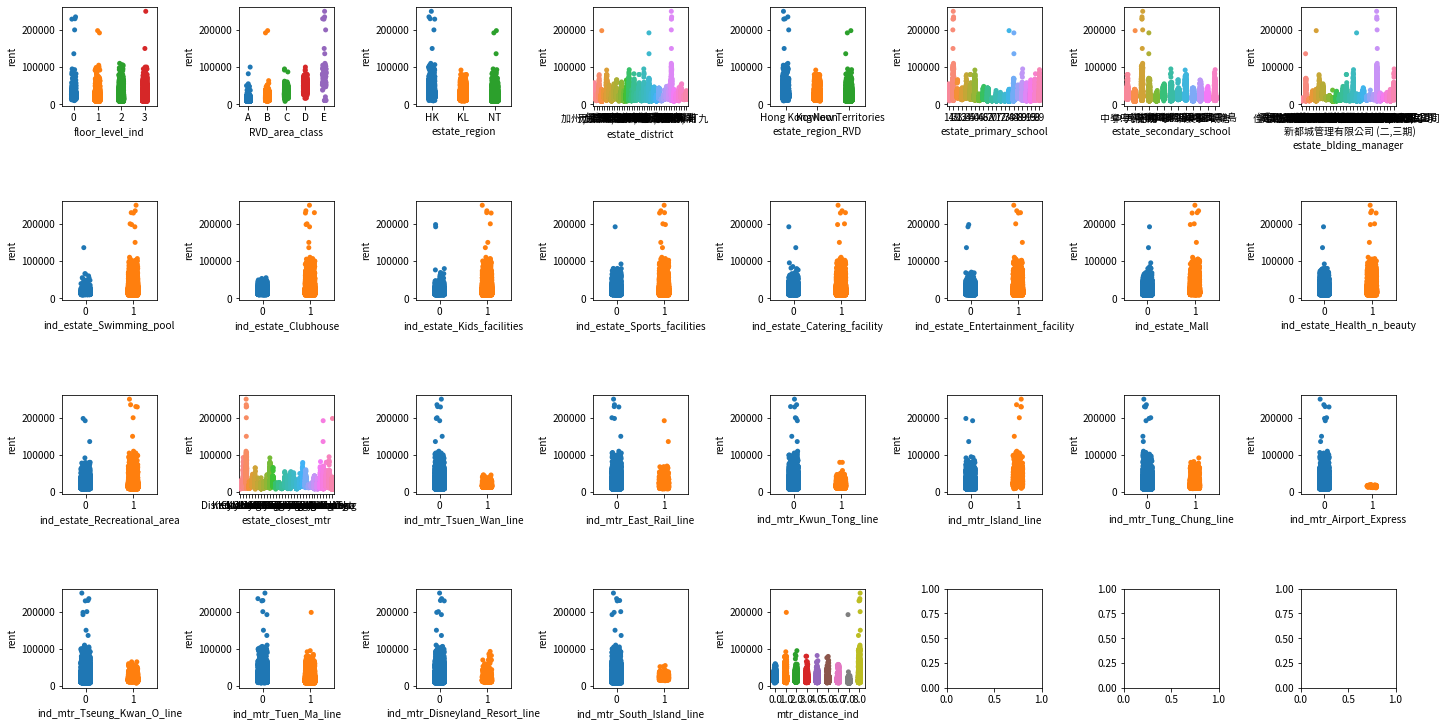

In [60]:
plot_subplots_stripplot(data[col_categorical], data["rent"], 4)

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


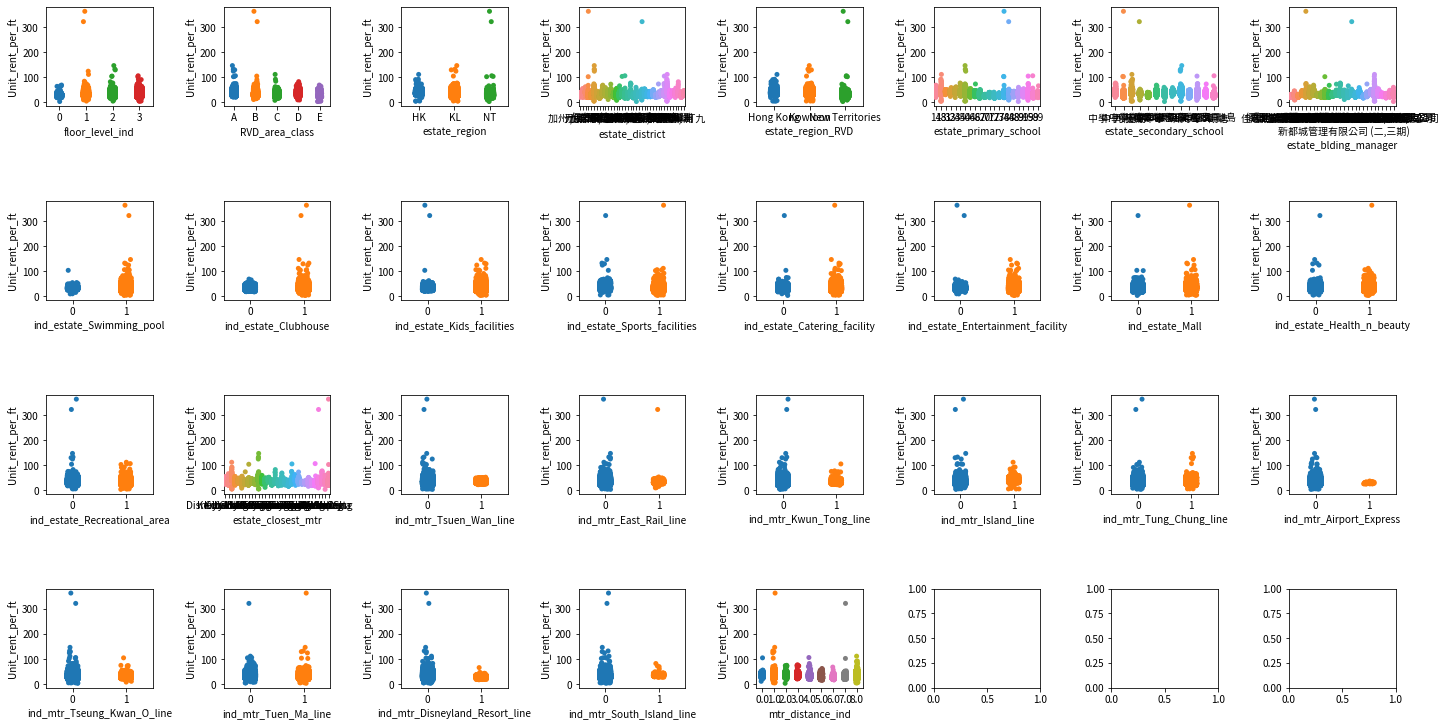

In [61]:
plot_subplots_stripplot(data[col_categorical], data["Unit_rent_per_ft"], 4)

## Modelling<a class="anchor" id="model"></a>


### Data preparation and split<a class="anchor" id="model_data_prep"></a>


In [173]:
data = df[col_values + col_values_RVD + col_categorical + col_response].copy()

In [174]:
#data = pd.get_dummies(data[data.columns[data.dtypes == 'category']], drop_first=True)
data = data.join(pd.get_dummies(data[col_categorical], drop_first=True))
data.drop(labels=col_categorical, inplace=True, axis=1)
data.head()

,net_area_ft,area_group,bedroom,estate_age,mtr_distance_m,month_from_now,RVD_rent_index_all_class,RVD_rent_index,RVD_avg_rent,RVD_rent_index_all_class_times_size,RVD_rent_index_times_size,RVD_avg_rent_times_size,rent,Unit_rent_per_ft,floor_level_ind_1,floor_level_ind_2,floor_level_ind_3,RVD_area_class_B,RVD_area_class_C,RVD_area_class_D,RVD_area_class_E,estate_region_KL,estate_region_NT,estate_district_九龍灣,estate_district_何文田,estate_district_元朗市中心,estate_district_加州 / 錦繡 / 葡萄園,estate_district_南昌站,estate_district_大圍,estate_district_天水圍,estate_district_太古,estate_district_奧運站,estate_district_寶琳,estate_district_將軍澳市中心,estate_district_屯門市中心,estate_district_康城,estate_district_愉景灣,estate_district_朗屏,estate_district_東涌,estate_district_海濱區,estate_district_海逸,estate_district_深井 / 青龍頭,estate_district_烏溪沙,estate_district_珀麗灣,estate_district_白石角,estate_district_第一城 / 石門,estate_district_美孚站,estate_district_荃灣市中心,estate_district_荃灣西,estate_district_藍地,estate_district_藍田,estate_district_觀塘,estate_district_調景嶺,estate_district_貝沙灣,estate_district_錦田,estate_district_馬鞍山,estate_district_鰂魚涌,estate_district_鴨脷洲,estate_district_麗城 / 汀九,estate_district_黃埔,estate_region_RVD_Kowloon,estate_region_RVD_New Territories,estate_primary_school_18,estate_primary_school_31,estate_primary_school_32,estate_primary_school_34,estate_primary_school_35,estate_primary_school_40,estate_primary_school_46,estate_primary_school_48,estate_primary_school_62,estate_primary_school_70,estate_primary_school_71,estate_primary_school_72,estate_primary_school_73,estate_primary_school_74,estate_primary_school_84,estate_primary_school_88,estate_primary_school_89,estate_primary_school_91,estate_primary_school_95,estate_primary_school_98,estate_primary_school_99,estate_secondary_school_中學: 元朗,estate_secondary_school_中學: 南區,estate_secondary_school_中學: 大埔,estate_secondary_school_中學: 屯門,estate_secondary_school_中學: 東區,estate_secondary_school_中學: 沙田,estate_secondary_school_中學: 油尖旺,estate_secondary_school_中學: 深水埗,estate_secondary_school_中學: 荃灣,estate_secondary_school_中學: 西貢,estate_secondary_school_中學: 觀塘,estate_secondary_school_中學: 離島,estate_blding_manager_佳定物業管理有限公司,estate_blding_manager_信和物業管理有限公司,estate_blding_manager_偉邦物業,estate_blding_manager_和記黃埔管理有限公司,estate_blding_manager_啟勝管理服務有限公司,estate_blding_manager_嘉里物業管理服務有限公司,estate_blding_manager_太古城物業管理有限公司,estate_blding_manager_富城物業管理有限公司,estate_blding_manager_富寧物業管理公司,estate_blding_manager_富邦物業管理有限公司,estate_blding_manager_尚悦管理有限公司,estate_blding_manager_帝譽服務有限公司,estate_blding_manager_康業服務有限公司,estate_blding_manager_恆隆管理公司,"estate_blding_manager_恒益物業管理有限公司 (一期)\n新都城管理有限公司 (二,三期)",estate_blding_manager_愉景灣服務管理有限公司,estate_blding_manager_捷盛（物業管理）有限公司,estate_blding_manager_新世界物業管理有限公司,estate_blding_manager_浪澄灣管理有限公司,estate_blding_manager_港基物業管理有限公司,estate_blding_manager_港基管理公司,estate_blding_manager_港灣豪庭管理有限公司,estate_blding_manager_港鐵公司,estate_blding_manager_百得物業管理有限公司,estate_blding_manager_興怡服務有限公司,estate_blding_manager_豪景花園管理有限公司,estate_blding_manager_超卓管理服務有限公司,estate_blding_manager_迎海管理有限公司,ind_estate_Swimming_pool_1,ind_estate_Clubhouse_1,ind_estate_Kids_facilities_1,ind_estate_Sports_facilities_1,ind_estate_Catering_facility_1,ind_estate_Entertainment_facility_1,ind_estate_Mall_1,ind_estate_Health_n_beauty_1,ind_estate_Recreational_area_1,estate_closest_mtr_Disneyland Resort,estate_closest_mtr_Kennedy Town,estate_closest_mtr_Kowloon Bay,estate_closest_mtr_Kwun Tong,estate_closest_mtr_LOHAS Park,estate_closest_mtr_Lam Tin,estate_closest_mtr_Long Ping,estate_closest_mtr_Ma On Shan,estate_closest_mtr_Mei Foo,estate_closest_mtr_Nam Cheong,estate_closest_mtr_Olympic,estate_closest_mtr_Po Lam,estate_closest_mtr_Sham Shui Po,estate_closest_mtr_Siu Hong,estate_closest_mtr_South Horizons,estate_closest_mtr_Sunny Bay,estate_closest_mtr_Tai Koo,estate_closest_mtr_Tai Wai,estate_closest_mtr_Tin Shui Wai,estate_closest_mtr_Tiu Keng Leng,estate_closest_mtr_To Kwa Wan,estate_closest_mtr_Tseung Kwan O,estate_closest_mtr_Tsing Yi,estate_closest_mtr_Tsuen

In [175]:
# To-DO : impute for the missing in RVD index/ avg rent instead of dropping (DONE, by using latest July RVD figures)
print('Original shape:', data.shape)
data.dropna(inplace=True)
print('After dropping NA shape:', data.shape)

Original shape: (31964, 181)
After dropping NA shape: (31964, 181)


In [176]:
# To-DO : try both of rent and unit rent with the models (DONE, predicting rent is better)
# To-DO : use cross-valudation instead of train-test split
# To-DO : log-transform response variables before regression
# To-DO : standardise value variables before fitting models other than tree-based
#y = data["Unit_rent_per_ft"].values
y = data["rent"].values
X = data.drop(labels=col_response, axis=1).values
print(X.shape, y.shape)

(31964, 179) (31964,)


In [177]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=999)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(22374, 179) (9590, 179)
(22374,) (9590,)


In [194]:
# Consolidated in 1 function for pipline actions (temp)
def data_preparation_and_split(df_input, col_response, col_categorical=[], text_size=0.3, random_state=999, response_col='rent', drop_na=True):
# output = X_train, X_test, y_train, y_test
  data = df_input.copy(deep=True)
  if len(col_categorical) > 0:
    data = data.join(pd.get_dummies(data[col_categorical], drop_first=True))
    data.drop(labels=col_categorical, inplace=True, axis=1)
  print('Original shape:', data.shape)
  if drop_na:
    data.dropna(inplace=True)
    print('After dropping NA shape:', data.shape)
  y = data[response_col].values
  X = data.drop(labels=col_response, axis=1).values
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=text_size, random_state=random_state)
  return X_train, X_test, y_train, y_test, data.columns

In [192]:
# present the results according to model.score and MSE by train and test sets
def print_summary_of_model(model, label, X_train, y_train, X_test, y_test):
  print('Summary of model:', label)
  print('Training score: ', np.round(model.score(X_train, y_train),4))
  print('Testing score: ', np.round(model.score(X_test, y_test),4))
  print(label, ": Training sqr MSE:", round(math.sqrt(mean_squared_error(y_train, xgb.predict(X_train))), 4))
  print(label, ": testing sqr MSE:", round(math.sqrt(mean_squared_error(y_test, xgb.predict(X_test))), 4))

### XGBoost model (as a base line and used for feature selection)<a class="anchor" id="model_xgboost"></a>


In [180]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

[16:00:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [181]:
print("Values variables:", col_values)
print("Categorical variables:", col_categorical)
print("RVD variables:", col_values_RVD)
print('Training score: ', np.round(xgb.score(X_train, y_train),4))
print('Testing score: ', np.round(xgb.score(X_test, y_test),4))

Values variables: ['net_area_ft', 'area_group', 'bedroom', 'estate_age', 'mtr_distance_m', 'month_from_now']
Categorical variables: ['floor_level_ind', 'RVD_area_class', 'estate_region', 'estate_district', 'estate_region_RVD', 'estate_primary_school', 'estate_secondary_school', 'estate_blding_manager', 'ind_estate_Swimming_pool', 'ind_estate_Clubhouse', 'ind_estate_Kids_facilities', 'ind_estate_Sports_facilities', 'ind_estate_Catering_facility', 'ind_estate_Entertainment_facility', 'ind_estate_Mall', 'ind_estate_Health_n_beauty', 'ind_estate_Recreational_area', 'estate_closest_mtr', 'ind_mtr_Tsuen_Wan_line', 'ind_mtr_East_Rail_line', 'ind_mtr_Kwun_Tong_line', 'ind_mtr_Island_line', 'ind_mtr_Tung_Chung_line', 'ind_mtr_Airport_Express', 'ind_mtr_Tseung_Kwan_O_line', 'ind_mtr_Tuen_Ma_line', 'ind_mtr_Disneyland_Resort_line', 'ind_mtr_South_Island_line', 'mtr_distance_ind']
RVD variables: ['RVD_rent_index_all_class', 'RVD_rent_index', 'RVD_avg_rent', 'RVD_rent_index_all_class_times_size', '

In [182]:
pred_train_xgb = xgb.predict(X_train)
pred_test_xgb = xgb.predict(X_test)
mse_train_xgb = mean_squared_error(y_train, pred_train_xgb)
mse_test_xgb = mean_squared_error(y_test, pred_test_xgb)
print("XGBoost: Training sqr MSE:", round(math.sqrt(mse_train_xgb), 4))
print("XGBoost: testing sqr MSE:", round(math.sqrt(mse_test_xgb), 4))

XGBoost: Training sqr MSE: 2557.1185
XGBoost: testing sqr MSE: 3522.7295


In [183]:
df_importance = pd.DataFrame(data={'vip':xgb.feature_importances_}, index=data.drop(labels=col_response, axis=1).columns).sort_values(by=['vip'], ascending=True)
df_importance.sort_values('vip', ascending=False).head(60)

,vip
RVD_avg_rent_times_size,0.386788
ind_estate_Catering_facility_1,0.062192
estate_district_貝沙灣,0.050737
net_area_ft,0.049329
RVD_rent_index_all_class_times_size,0.046859
estate_secondary_school_中學: 元朗,0.034545
estate_district_天水圍,0.031948
mtr_distance_m,0.031891
estate_age,0.028309
RVD_rent_index_times_size,0.024812


Text(0.5, 1.0, 'Variable Importance')

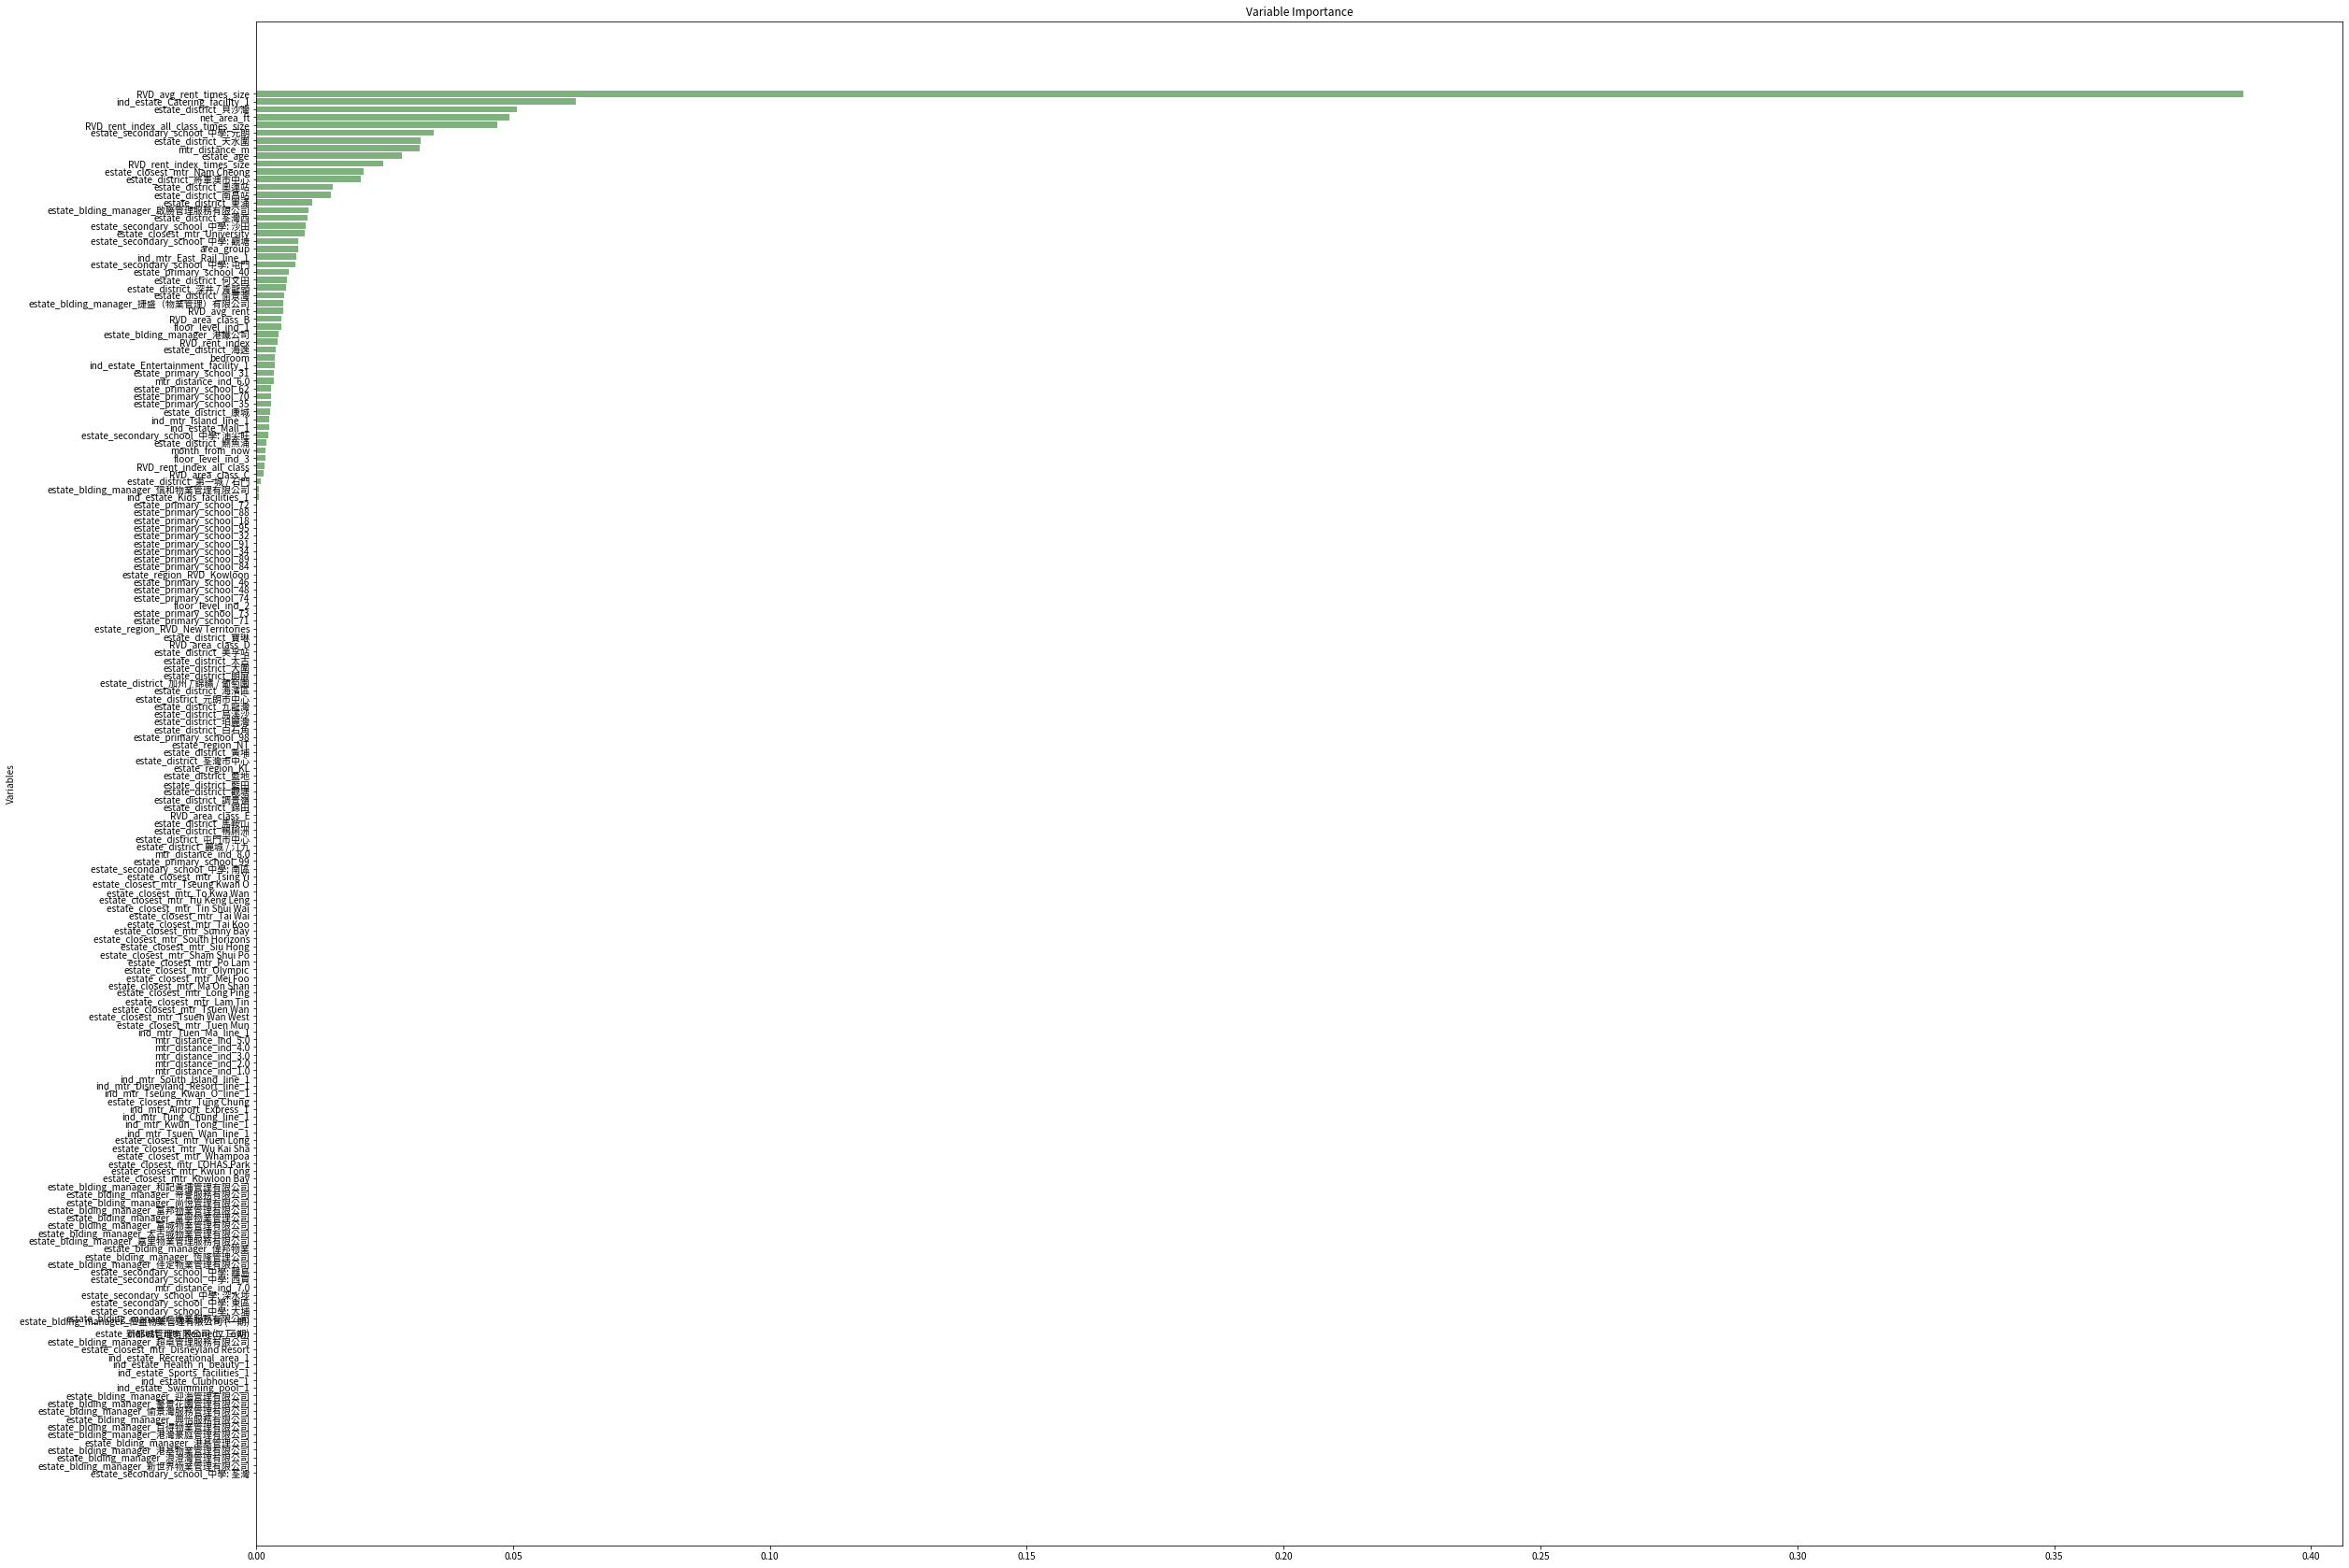

In [184]:
plt.figure(1, figsize=(40,30))
plt.title("Variable Importance vs Variable")
plt.barh(df_importance.index, df_importance['vip'], align='center', color='darkgreen', alpha=0.5)
plt.yticks(range(len(df_importance.index)))
plt.ylabel('Variables')
plt.title('Variable Importance')

#### XGBoost model results history<a class="anchor" id="model_xgboost_result"></a>


##### XGBoost model results history (Set 1)<a class="anchor" id="model_xgboost_result_1"></a>

**First set of case testing**

Test case 1: with estate ID
```
Training score:  0.9181
Testing score:  0.8442
```
Test case 2: without estate ID and with mtr ind instead of exact
```
Values variables: ['floor_level_ind', 'net_area_ft', 'area_group', 'bedroom', 'estate_age']
Categorical variables: ['RVD_area_class', 'estate_region', 'estate_district', 'estate_region_RVD', 'estate_primary_school', 'estate_secondary_school', 'estate_blding_manager', 'ind_estate_Swimming_pool', 'ind_estate_Clubhouse', 'ind_estate_Kids_facilities', 'ind_estate_Sports_facilities', 'ind_estate_Catering_facility', 'ind_estate_Entertainment_facility', 'ind_estate_Mall', 'ind_estate_Health_n_beauty', 'ind_estate_Recreational_area', 'estate_closest_mtr', 'ind_mtr_Tsuen_Wan_line', 'ind_mtr_East_Rail_line', 'ind_mtr_Kwun_Tong_line', 'ind_mtr_Island_line', 'ind_mtr_Tung_Chung_line', 'ind_mtr_Airport_Express', 'ind_mtr_Tseung_Kwan_O_line', 'ind_mtr_Tuen_Ma_line', 'ind_mtr_Disneyland_Resort_line', 'ind_mtr_South_Island_line']
Training score:  0.9168
Testing score:  0.8444
```
Test case 3: with estate ID and with mtr ind instead of exact
```
Values variables: ['floor_level_ind', 'net_area_ft', 'area_group', 'bedroom', 'estate_age']
Categorical variables: ['RVD_area_class', 'estate_region', 'estate_district', 'estate_region_RVD', 'estate_primary_school', 'estate_secondary_school', 'estate_blding_manager', 'ind_estate_Swimming_pool', 'ind_estate_Clubhouse', 'ind_estate_Kids_facilities', 'ind_estate_Sports_facilities', 'ind_estate_Catering_facility', 'ind_estate_Entertainment_facility', 'ind_estate_Mall', 'ind_estate_Health_n_beauty', 'ind_estate_Recreational_area', 'estate_closest_mtr', 'ind_mtr_Tsuen_Wan_line', 'ind_mtr_East_Rail_line', 'ind_mtr_Kwun_Tong_line', 'ind_mtr_Island_line', 'ind_mtr_Tung_Chung_line', 'ind_mtr_Airport_Express', 'ind_mtr_Tseung_Kwan_O_line', 'ind_mtr_Tuen_Ma_line', 'ind_mtr_Disneyland_Resort_line', 'ind_mtr_South_Island_line', 'estate_ID', 'mtr_distance_ind']
Training score:  0.9171
Testing score:  0.8462
```
Test case 4: without estate ID and with both mtr exact only
```
Values variables: ['floor_level_ind', 'net_area_ft', 'area_group', 'bedroom', 'estate_age', 'mtr_distance_m']
Categorical variables: ['RVD_area_class', 'estate_region', 'estate_district', 'estate_region_RVD', 'estate_primary_school', 'estate_secondary_school', 'estate_blding_manager', 'ind_estate_Swimming_pool', 'ind_estate_Clubhouse', 'ind_estate_Kids_facilities', 'ind_estate_Sports_facilities', 'ind_estate_Catering_facility', 'ind_estate_Entertainment_facility', 'ind_estate_Mall', 'ind_estate_Health_n_beauty', 'ind_estate_Recreational_area', 'estate_closest_mtr', 'ind_mtr_Tsuen_Wan_line', 'ind_mtr_East_Rail_line', 'ind_mtr_Kwun_Tong_line', 'ind_mtr_Island_line', 'ind_mtr_Tung_Chung_line', 'ind_mtr_Airport_Express', 'ind_mtr_Tseung_Kwan_O_line', 'ind_mtr_Tuen_Ma_line', 'ind_mtr_Disneyland_Resort_line', 'ind_mtr_South_Island_line']
Training score:  0.9173
Testing score:  0.844
```
Test case 5: without estate ID and with both mtr ind and exact
```
Values variables: ['floor_level_ind', 'net_area_ft', 'area_group', 'bedroom', 'estate_age', 'mtr_distance_m']
Categorical variables: ['RVD_area_class', 'estate_region', 'estate_district', 'estate_region_RVD', 'estate_primary_school', 'estate_secondary_school', 'estate_blding_manager', 'ind_estate_Swimming_pool', 'ind_estate_Clubhouse', 'ind_estate_Kids_facilities', 'ind_estate_Sports_facilities', 'ind_estate_Catering_facility', 'ind_estate_Entertainment_facility', 'ind_estate_Mall', 'ind_estate_Health_n_beauty', 'ind_estate_Recreational_area', 'estate_closest_mtr', 'ind_mtr_Tsuen_Wan_line', 'ind_mtr_East_Rail_line', 'ind_mtr_Kwun_Tong_line', 'ind_mtr_Island_line', 'ind_mtr_Tung_Chung_line', 'ind_mtr_Airport_Express', 'ind_mtr_Tseung_Kwan_O_line', 'ind_mtr_Tuen_Ma_line', 'ind_mtr_Disneyland_Resort_line', 'ind_mtr_South_Island_line', 'mtr_distance_ind']
Training score:  0.9183
Testing score:  0.8459
```
**Conclusion: Remove estate ID and add mtr ind**



##### XGBoost model results history (Set 2)<a class="anchor" id="model_xgboost_result_2"></a>

**Second set of test cases**

Test case 1: move floor_level_ind to categorical from value
```
Values variables: ['net_area_ft', 'area_group', 'bedroom', 'estate_age', 'mtr_distance_m']
Categorical variables: ['floor_level_ind', 'RVD_area_class', 'estate_region', 'estate_district', 'estate_region_RVD', 'estate_primary_school', 'estate_secondary_school', 'estate_blding_manager', 'ind_estate_Swimming_pool', 'ind_estate_Clubhouse', 'ind_estate_Kids_facilities', 'ind_estate_Sports_facilities', 'ind_estate_Catering_facility', 'ind_estate_Entertainment_facility', 'ind_estate_Mall', 'ind_estate_Health_n_beauty', 'ind_estate_Recreational_area', 'estate_closest_mtr', 'ind_mtr_Tsuen_Wan_line', 'ind_mtr_East_Rail_line', 'ind_mtr_Kwun_Tong_line', 'ind_mtr_Island_line', 'ind_mtr_Tung_Chung_line', 'ind_mtr_Airport_Express', 'ind_mtr_Tseung_Kwan_O_line', 'ind_mtr_Tuen_Ma_line', 'ind_mtr_Disneyland_Resort_line', 'ind_mtr_South_Island_line', 'mtr_distance_ind']
Training score:  0.919
Testing score:  0.8457
```
Test case 2: move floor_level_ind and area_group to categorical from value
```
Values variables: ['net_area_ft', 'bedroom', 'estate_age', 'mtr_distance_m']
Categorical variables: ['floor_level_ind', 'area_group', 'RVD_area_class', 'estate_region', 'estate_district', 'estate_region_RVD', 'estate_primary_school', 'estate_secondary_school', 'estate_blding_manager', 'ind_estate_Swimming_pool', 'ind_estate_Clubhouse', 'ind_estate_Kids_facilities', 'ind_estate_Sports_facilities', 'ind_estate_Catering_facility', 'ind_estate_Entertainment_facility', 'ind_estate_Mall', 'ind_estate_Health_n_beauty', 'ind_estate_Recreational_area', 'estate_closest_mtr', 'ind_mtr_Tsuen_Wan_line', 'ind_mtr_East_Rail_line', 'ind_mtr_Kwun_Tong_line', 'ind_mtr_Island_line', 'ind_mtr_Tung_Chung_line', 'ind_mtr_Airport_Express', 'ind_mtr_Tseung_Kwan_O_line', 'ind_mtr_Tuen_Ma_line', 'ind_mtr_Disneyland_Resort_line', 'ind_mtr_South_Island_line', 'mtr_distance_ind']
Training score:  0.9173
Testing score:  0.8445
```
Test case 3: move floor_level_ind to categorical and add estate_age_ind
```
Values variables: ['net_area_ft', 'area_group', 'bedroom', 'estate_age', 'mtr_distance_m']
Categorical variables: ['floor_level_ind', 'RVD_area_class', 'estate_region', 'estate_district', 'estate_region_RVD', 'estate_primary_school', 'estate_secondary_school', 'estate_blding_manager', 'ind_estate_Swimming_pool', 'ind_estate_Clubhouse', 'ind_estate_Kids_facilities', 'ind_estate_Sports_facilities', 'ind_estate_Catering_facility', 'ind_estate_Entertainment_facility', 'ind_estate_Mall', 'ind_estate_Health_n_beauty', 'ind_estate_Recreational_area', 'estate_closest_mtr', 'ind_mtr_Tsuen_Wan_line', 'ind_mtr_East_Rail_line', 'ind_mtr_Kwun_Tong_line', 'ind_mtr_Island_line', 'ind_mtr_Tung_Chung_line', 'ind_mtr_Airport_Express', 'ind_mtr_Tseung_Kwan_O_line', 'ind_mtr_Tuen_Ma_line', 'ind_mtr_Disneyland_Resort_line', 'ind_mtr_South_Island_line', 'mtr_distance_ind', 'estate_age_ind']
Training score:  0.9187
Testing score:  0.8444
```
**Conclusion: no need to create a group for estate_age and better move floor_level_ind as categorical**

##### XGBoost model results history (Set 3)<a class="anchor" id="model_xgboost_result_3"></a>

**Third set of test cases**

Test case 1: Fit for unit rent per ft instead of rent
```
Values variables: ['net_area_ft', 'area_group', 'bedroom', 'estate_age', 'mtr_distance_m']
Categorical variables: ['floor_level_ind', 'RVD_area_class', 'estate_region', 'estate_district', 'estate_region_RVD', 'estate_primary_school', 'estate_secondary_school', 'estate_blding_manager', 'ind_estate_Swimming_pool', 'ind_estate_Clubhouse', 'ind_estate_Kids_facilities', 'ind_estate_Sports_facilities', 'ind_estate_Catering_facility', 'ind_estate_Entertainment_facility', 'ind_estate_Mall', 'ind_estate_Health_n_beauty', 'ind_estate_Recreational_area', 'estate_closest_mtr', 'ind_mtr_Tsuen_Wan_line', 'ind_mtr_East_Rail_line', 'ind_mtr_Kwun_Tong_line', 'ind_mtr_Island_line', 'ind_mtr_Tung_Chung_line', 'ind_mtr_Airport_Express', 'ind_mtr_Tseung_Kwan_O_line', 'ind_mtr_Tuen_Ma_line', 'ind_mtr_Disneyland_Resort_line', 'ind_mtr_South_Island_line', 'mtr_distance_ind']
Training score:  0.7707
Testing score:  0.6643
```


##### XGBoost model results history (Set 4)<a class="anchor" id="model_xgboost_result_4"></a>

**Fourth set of test cases**

Test case 1: Add interaction terms
```
Values variables: ['net_area_ft', 'area_group', 'bedroom', 'estate_age', 'mtr_distance_m', 'month_from_now']
Categorical variables: ['floor_level_ind', 'RVD_area_class', 'estate_region', 'estate_district', 'estate_region_RVD', 'estate_primary_school', 'estate_secondary_school', 'estate_blding_manager', 'ind_estate_Swimming_pool', 'ind_estate_Clubhouse', 'ind_estate_Kids_facilities', 'ind_estate_Sports_facilities', 'ind_estate_Catering_facility', 'ind_estate_Entertainment_facility', 'ind_estate_Mall', 'ind_estate_Health_n_beauty', 'ind_estate_Recreational_area', 'estate_closest_mtr', 'ind_mtr_Tsuen_Wan_line', 'ind_mtr_East_Rail_line', 'ind_mtr_Kwun_Tong_line', 'ind_mtr_Island_line', 'ind_mtr_Tung_Chung_line', 'ind_mtr_Airport_Express', 'ind_mtr_Tseung_Kwan_O_line', 'ind_mtr_Tuen_Ma_line', 'ind_mtr_Disneyland_Resort_line', 'ind_mtr_South_Island_line', 'mtr_distance_ind']
RVD variables: ['RVD_rent_index_all_class', 'RVD_rent_index', 'RVD_avg_rent', 'RVD_rent_index_all_class_times_size', 'RVD_rent_index_times_size', 'RVD_avg_rent_times_size']
Training score:  0.918
Testing score:  0.8429
```
**Conclusion: keep the new parameter as no performance drop and the interaction term has ben already captured by the original non-linear model**

#### XGBoost model results for sub-models<a class="anchor" id="model_xgboost_result_submodel"></a>


In [185]:
data = df[col_values + col_values_RVD + col_categorical + col_response][df['area_group'] <= 5].copy()
X_train, X_test, y_train, y_test, _ = data_preparation_and_split(data, col_response, col_categorical)
xgb_A = XGBRegressor()
xgb_A.fit(X_train, y_train)
print_summary_of_model(xgb_A, 'XGBoost-A', X_train, y_train, X_test, y_test)

Original shape: (31034, 181)
After dropping NA shape: (31034, 181)
[16:00:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Summary of model: XGBoost-A
Training score:  0.8673
Testing score:  0.8323
XGBoost: Training sqr MSE: 2358.3864
XGBoost: testing sqr MSE: 2505.9475


In [186]:
data = df[col_values + col_values_RVD + col_categorical + col_response][df['area_group'] <= 6].copy()
X_train, X_test, y_train, y_test, _ = data_preparation_and_split(data, col_response, col_categorical)
xgb_B = XGBRegressor()
xgb_B.fit(X_train, y_train)
print_summary_of_model(xgb_B, 'XGBoost-B', X_train, y_train, X_test, y_test)

Original shape: (31708, 181)
After dropping NA shape: (31708, 181)
[16:00:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Summary of model: XGBoost-B
Training score:  0.8817
Testing score:  0.9202
XGBoost: Training sqr MSE: 2683.3614
XGBoost: testing sqr MSE: 2045.9047


In [187]:
data = df[col_values + col_values_RVD + col_categorical + col_response][df['area_group'].between(2, 8)].copy()
X_train, X_test, y_train, y_test, _ = data_preparation_and_split(data, col_response, col_categorical)
xgb_C = XGBRegressor()
xgb_C.fit(X_train, y_train)
print_summary_of_model(xgb_C, 'XGBoost-C', X_train, y_train, X_test, y_test)

Original shape: (31914, 181)
After dropping NA shape: (31914, 181)
[16:01:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Summary of model: XGBoost-C
Training score:  0.901
Testing score:  0.8952
XGBoost: Training sqr MSE: 2862.2089
XGBoost: testing sqr MSE: 2297.2554


### Decision Tree model (Not use)<a class="anchor" id="model_decision_tree"></a>


In [188]:
# new data set
data = df[col_values + col_values_RVD + col_categorical + col_response].copy()
X_train, X_test, y_train, y_test, new_columns = data_preparation_and_split(data, col_response, col_categorical)

Original shape: (31964, 181)
After dropping NA shape: (31964, 181)


In [189]:
# To-DO : try other tree models (DONE by XGBoost)

reg = tree.DecisionTreeRegressor(max_depth=5, random_state=999).fit(X_train,y_train)
yhat = reg.predict(X_test)
print("RMSE: ", np.round(np.sqrt(((y_test - yhat)**2).mean(axis=0)),4))
print("STD(y_test): ", np.round(y_test.std(),4))
print("Goodness-of-fit Measure:", np.round(r2_score(y_test, yhat),4))

RMSE:  4269.8072
STD(y_test):  8889.0016
Goodness-of-fit Measure: 0.7693


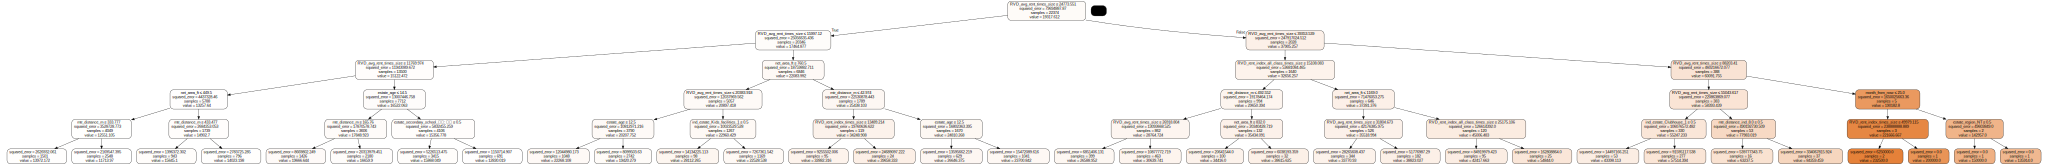

In [190]:
import pydotplus
import graphviz

dot_data = tree.export_graphviz(reg, out_file=None,
  feature_names=[e for e in new_columns if e not in col_response],
  filled=True, rounded=True,
  special_characters=True) 
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.set_size('"45,30!"')
gvz_graph = graphviz.Source(pydot_graph.to_string())
gvz_graph

In [191]:
df_importance = pd.DataFrame(data={'vip':reg.feature_importances_}, index=[e for e in new_columns if e not in col_response]).sort_values(by=['vip'], ascending=True)
df_importance.sort_values('vip', ascending=False).head(10)

,vip
RVD_avg_rent_times_size,0.902083
net_area_ft,0.028132
mtr_distance_m,0.018713
RVD_rent_index_all_class_times_size,0.016839
estate_age,0.013986
ind_estate_Clubhouse_1,0.005773
month_from_now,0.004842
estate_secondary_school_中學: 元朗,0.003455
mtr_distance_ind_8.0,0.003245
ind_estate_Kids_facilities_1,0.001836


### LASSO regression model (for variable selection under linear models)<a class="anchor" id="model_lasso_regression"></a>


In [273]:
# new data set
data = df[col_values + col_values_RVD + col_categorical + col_response].copy()
X_train_values, X_test_values, y_train, y_test, new_columns_values = data_preparation_and_split(data[col_values + col_response], col_response)
X_train_RVD, X_test_RVD, _ , _ , new_columns_RVD = data_preparation_and_split(data[col_values_RVD + col_response], col_response)
X_train_categorical, X_test_categorical, _ , _ , new_columns_categorical = data_preparation_and_split(data[col_categorical + col_response], col_response, col_categorical)

Original shape: (31964, 8)
After dropping NA shape: (31964, 8)
Original shape: (31964, 8)
After dropping NA shape: (31964, 8)
Original shape: (31964, 169)
After dropping NA shape: (31964, 169)


In [276]:
X_train_RVD = X_train_RVD.astype(float)
X_test_RVD = X_test_RVD.astype(float)

In [277]:
scaler = StandardScaler(with_std=False)
transformer = FunctionTransformer(np.log1p, inverse_func = np.expm1)
pipe_x_values = Pipeline(steps=[('transformer', transformer), ('scaler', StandardScaler(with_std=False))])
pipe_y = Pipeline(steps=[('transformer', transformer), ('scaler', StandardScaler(with_std=False))])

In [286]:
scaler = MinMaxScaler()
transformer = FunctionTransformer(np.log1p, inverse_func = np.expm1)
pipe_x_values = Pipeline(steps=[('transformer', transformer), ('scaler', MinMaxScaler())])
pipe_y = Pipeline(steps=[('transformer', transformer), ('scaler', MinMaxScaler())])

In [287]:
scaler_x_values = scaler.fit(X_train_values)

X_train_std = np.concatenate((scaler_x_values.transform(X_train_values), pipe_x_values.fit_transform(X_train_RVD), X_train_categorical), axis=1)
y_train_std = pipe_y.fit_transform(y_train.reshape(-1, 1))
X_test_std = np.concatenate((scaler_x_values.transform(X_test_values), pipe_x_values.transform(X_test_RVD), X_test_categorical), axis=1)
y_test_std = pipe_y.transform(y_test.reshape(-1, 1))

In [292]:
# To-DO : fine-tune the parameter by cross validation grid search
lasso = Lasso(fit_intercept=False, alpha=0.1).fit(X_train_std, y_train_std)

# The coefficients
print("Coefficients: \n", np.round(lasso.intercept_,4), np.round(lasso.coef_,4))

print('Training R^2: ', np.round(lasso.score(X_train_std, y_train_std),4))
print('Testing R^2: ', np.round(lasso.score(X_test_std, y_test_std),4))

pred_train_lasso = lasso.predict(X_train_std)
pred_test_lasso = lasso.predict(X_test_std)

# Evaluate Model Performance (Mean Squared Error) on the Testing Set
print("Testing Mean squared error (Test MSE): %.2f" % np.round(np.mean((y_test_std - pred_test_lasso) ** 2),4))

Coefficients: 
 0.0 [ 0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
 -0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.     -0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.     -0.      0.     -0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.     -0.      0.     -0.      0.      0.      0.
  0.      0.      0.     -0.     -0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.1575  0.      0.      0.      0.
  0.      0.  

### Regression model<a class="anchor" id="model_regression"></a>


In [130]:
# new data set
data = df[col_values + col_values_RVD + col_categorical + col_response].copy()
X_train_values, X_test_values, y_train, y_test, new_columns_values = data_preparation_and_split(data[col_values + col_response], col_response)
X_train_RVD, X_test_RVD, _ , _ , new_columns_RVD = data_preparation_and_split(data[col_values_RVD + col_response], col_response)
X_train_categorical, X_test_categorical, _ , _ , new_columns_categorical = data_preparation_and_split(df_input=data[col_categorical + col_response], col_response=col_response, drop_na=False)

Original shape: (31964, 8)
After dropping NA shape: (31964, 8)
Original shape: (31964, 8)
After dropping NA shape: (31964, 8)
Original shape: (31964, 31)


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
std_x = StandardScaler(with_std=False).fit(X_train)
std_y = StandardScaler(with_std=False).fit(y_train.reshape(-1, 1))
X_train_std = std_x.transform(X_train)
X_test_std  = std_x.transform(X_test)
y_train_std = std_y.transform(y_train.reshape(-1, 1))
y_test_std  = std_y.transform(y_test.reshape(-1, 1))

In [ ]:
print(list(data.drop(labels=col_response, axis=1).columns))

In [ ]:
ls = LinearRegression(fit_intercept=False)
ls.fit(X_train_std, y_train_std)
pred_train_ls = ls.predict(X_train_std)
pred_test_ls = ls.predict(X_test_std)

# The coefficients
print("Coefficients: \n", np.round(ls.intercept_,4), np.round(ls.coef_,4))

print('Training R^2: ', np.round(ls.score(X_train_std, y_train_std),4))
print('Testing R^2: ', np.round(ls.score(X_test_std, y_test_std),4))

# Apply the Fitted Model to the training set and test set
pred_train_ls = ls.predict(X_train_std)
pred_test_ls = ls.predict(X_test_std)

# Evaluate Model Performance (Mean Squared Error) on the Testing Set
print("Testing Mean squared error (Test MSE): %.2f" % np.round(np.mean((y_test_std - pred_test_ls) ** 2), 4))

### Linear Support Vector Regression model<a class="anchor" id="model_linear_SVR"></a>


In [ ]:
# To-DO : ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.  ConvergenceWarning,

svr = LinearSVR(random_state=999, tol=1e-5)
svr.fit(X_train_std, np.ravel(y_train_std))
print('Accuracy score (Training set)', np.round(svr.score(X_train_std,np.ravel(y_train_std)),4))
print('Accuracy score (Test set)', np.round(svr.score(X_test_std,np.ravel(y_test_std)),4))

### Neural Networks model (To-DO)<a class="anchor" id="model_NN"></a>
